#Data loading and Preparation

In [54]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [55]:
#Loading data
path = '/content/4A_cleaned_8_.xlsx'
data =pd.read_excel(path)
data.head(2)

,IP NUMBER,UNIT,SEX,AGE,MARITAL STATUS,RELIGION,DISTRICT OF RESIDENCE,REGION,WORKING DIAGNOSIS,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,TB_type,NUMBER OF PREVIOUS ADMISSIONS,DAY OF ADMISSION,MONTH OF ADMISSION,YEAR OF ADMISSION,DURATION,OUT COME
0,1861416,GI,M,30,2,COU,Nakasongola,CENTRAL,"ISS,Abdominal TB,,","ISS,,",1,Abdominal_TB,5,Tuesday,November,2010,6,IMPROVED
1,1868011,GI,F,46,2,COU,Kampala,CENTRAL,"ISS Stage I&II,Disseminated TB,,","ISS Stage I&II,,",1,Disseminated TB,3,Monday,December,2010,4,IMPROVED


In [56]:
data['TB_type'].unique()

array(['Abdominal_TB', 'Disseminated TB', 'PTB', 'Other TBs', 'CNS_TB',
       'TB iris'], dtype=object)

##**Preparing data**

In [57]:
data.dropna(subset=['NUMBER OF PREVIOUS ADMISSIONS'], inplace=True)
data.dropna(subset=['IP NUMBER'], inplace=True)

data = data[data['IP NUMBER']  != 'a' ]
data = data[data['IP NUMBER']  != 'vf' ]

In [58]:
data.shape

(4029, 18)

In [59]:
#data.to_excel('final_cleaned_TB-4a.xlsx', index=False)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4029 entries, 0 to 4028
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   IP NUMBER                               4029 non-null   object
 1   UNIT                                    4029 non-null   object
 2   SEX                                     4029 non-null   object
 3   AGE                                     4029 non-null   int64 
 4   MARITAL STATUS                          4026 non-null   object
 5   RELIGION                                4029 non-null   object
 6   DISTRICT OF RESIDENCE                   4029 non-null   object
 7   REGION                                  4029 non-null   object
 8   WORKING DIAGNOSIS                       4029 non-null   object
 9   ADDITIONAL WORKING DIAGNOSIS            3849 non-null   object
 10  NUMBER OF ADDITIONAL WORKING DIAGNOSIS  4029 non-null   int64 
 11  TB_t

In [61]:
#filtering out only patients with "DIED" outcome
data = data[data['OUT COME'] == 'DIED']

In [62]:
#Deleting features which are not going to be used
features_to_remove = ['IP NUMBER', 'UNIT','YEAR OF ADMISSION','DISTRICT OF RESIDENCE','WORKING DIAGNOSIS' ,'ADDITIONAL WORKING DIAGNOSIS',
                'MARITAL STATUS']
data = data.drop(columns = features_to_remove)

In [63]:

non_features = ['OUT COME']
data1 = data.drop(columns=non_features)

#**Data Preprocessing**

##Cleaning and filtering

In [64]:
#filtering out only patients with "DIED" outcome
data = data[data['OUT COME'] == 'DIED']

In [65]:
#data['YEAR OF ADMISSION'] = data['YEAR OF ADMISSION'].astype(str)

In [66]:
data = data.drop(columns=['OUT COME'])

In [67]:
#Encoding categorical features
non_features = ['DURATION', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS','AGE','NUMBER OF PREVIOUS ADMISSIONS']
data1 = data.drop(columns=non_features)

text_columns = data1.select_dtypes(include=['object']).columns

data2 = pd.get_dummies(data, columns=text_columns)

In [68]:
data2['NUMBER OF PREVIOUS ADMISSIONS'].unique()

array([ 2,  4,  5,  1,  7,  6,  9, 20, 11, 13,  3,  8, 15, 14, 10, 18, 16,
       22, 21, 25, 12, 26, 23, 92,  0])

In [69]:
data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'] = data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'].astype(float)
data2['AGE'] = data2['AGE'].astype(float)

In [70]:
data2.sample(4)

,AGE,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,NUMBER OF PREVIOUS ADMISSIONS,DURATION,SEX_F,SEX_M,RELIGION_CATHOLIC,RELIGION_COU,RELIGION_ISLAM,RELIGION_OTHERS,...,MONTH OF ADMISSION_December,MONTH OF ADMISSION_February,MONTH OF ADMISSION_January,MONTH OF ADMISSION_July,MONTH OF ADMISSION_June,MONTH OF ADMISSION_March,MONTH OF ADMISSION_May,MONTH OF ADMISSION_November,MONTH OF ADMISSION_October,MONTH OF ADMISSION_September
1943,33.0,2.0,0,5,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2344,40.0,3.0,0,4,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1383,27.0,1.0,0,2,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1407,42.0,1.0,0,4,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [71]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 5 to 4025
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   AGE                                     1289 non-null   float64
 1   NUMBER OF ADDITIONAL WORKING DIAGNOSIS  1289 non-null   float64
 2   NUMBER OF PREVIOUS ADMISSIONS           1289 non-null   int64  
 3   DURATION                                1289 non-null   int64  
 4   SEX_F                                   1289 non-null   uint8  
 5   SEX_M                                   1289 non-null   uint8  
 6   RELIGION_CATHOLIC                       1289 non-null   uint8  
 7   RELIGION_COU                            1289 non-null   uint8  
 8   RELIGION_ISLAM                          1289 non-null   uint8  
 9   RELIGION_OTHERS                         1289 non-null   uint8  
 10  RELIGION_PENTECOSTAL                    1289 non-null   uint

AGE
Skewness of: 0.9496632846993347


<ipython-input-72-295a527e9a52>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


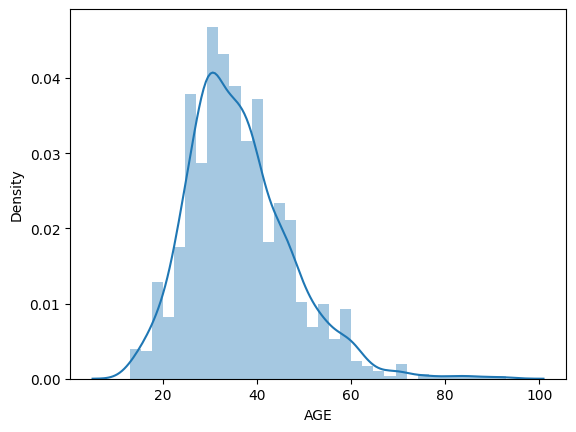

NUMBER OF PREVIOUS ADMISSIONS
Skewness of: 9.753179046520078


<ipython-input-72-295a527e9a52>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


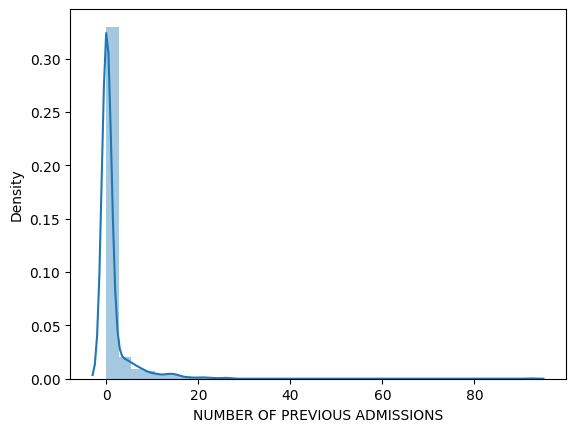

NUMBER OF ADDITIONAL WORKING DIAGNOSIS
Skewness of: 0.4788406731096686


<ipython-input-72-295a527e9a52>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


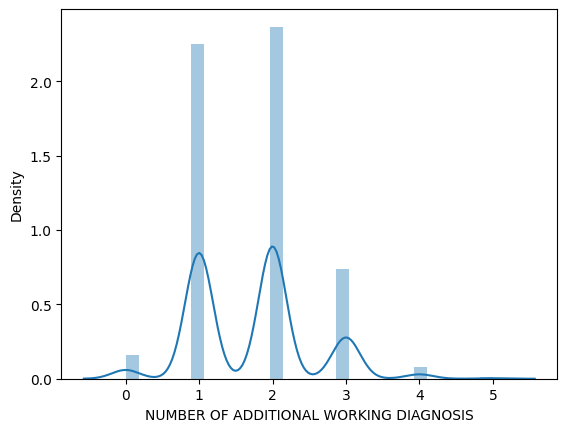

DURATION
Skewness of: 1.4126507630182499


<ipython-input-72-295a527e9a52>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


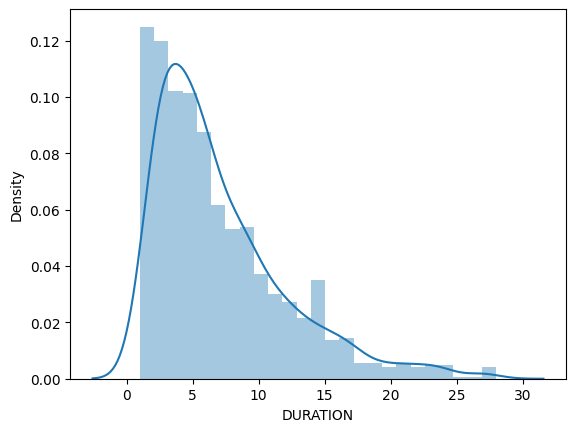

In [72]:
from scipy.stats import skew
import seaborn as sns

#Visualizing skeness of the continuous features
continuous_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS','DURATION']
for col in continuous_features:
  print(col)
  print(f"Skewness of: {skew(data2[col])}")

  plt.figure()
  sns.distplot(data2[col])
  plt.show()

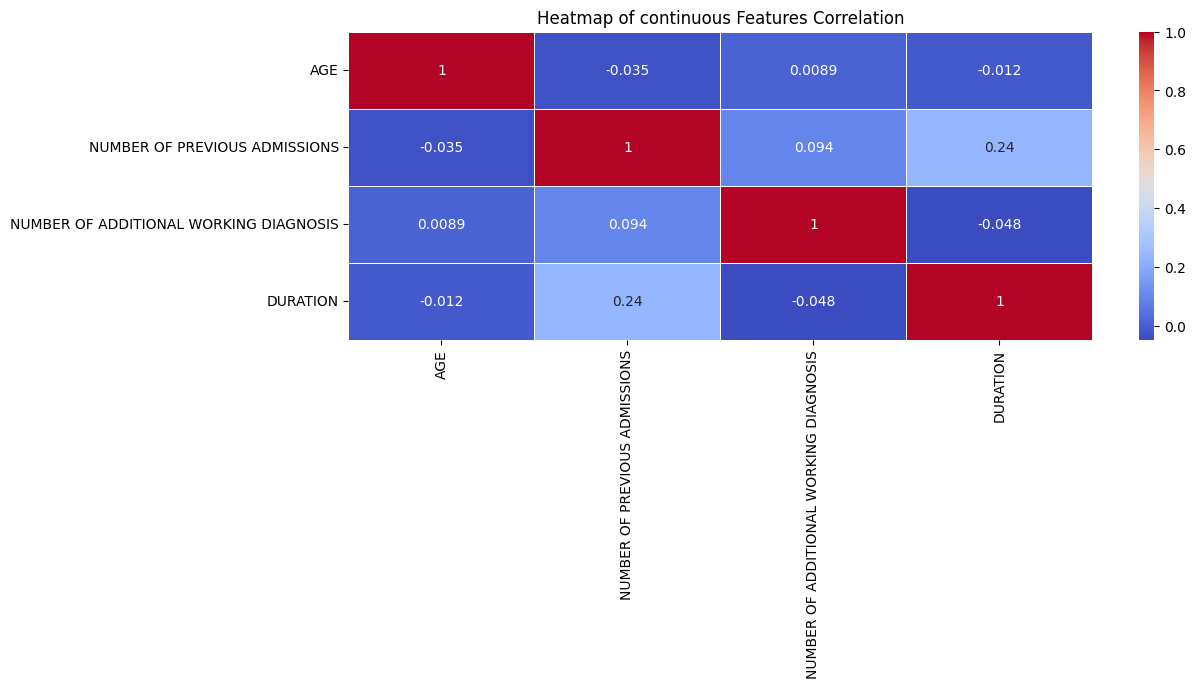

In [73]:
#Visualizing Correlation among the continuous features nluding the target
continuous_features_target = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'DURATION']
plt.figure(figsize=(12,4))
sns.heatmap(data2[continuous_features_target].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of continuous Features Correlation')
plt.show()

##Transforming features and target

In [74]:
# #Transforming the continuous features
# transform_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS']
# for col in transform_features:
#   data2[col] = np.log1p(data2[col])

# #Second transformation
# data2['NUMBER OF PREVIOUS ADMISSIONS'] = np.log1p(data2['NUMBER OF PREVIOUS ADMISSIONS'])


In [75]:
data['DURATION'].unique()

array([ 3,  5,  6,  2,  8,  9, 21, 11,  7,  1, 13, 15, 16,  4, 18, 12, 17,
       10, 14, 23, 19, 27, 24, 22, 25, 26, 28, 20])

In [76]:
# #Skewness and density plot
# data2['DURATION_LOG'] = np.log(data2['DURATION'])
# skewness = skew(data2['DURATION_LOG'], nan_policy='omit')
# print(f"Skewness: {skewness}")
# sns.displot(data2['DURATION_LOG'], kde=True)  # kde=True adds a kernel density estimate
# plt.show()

In [77]:
# data2 = data2.replace([np.inf, -np.inf], np.nan)
# data2 = data2.dropna()


##Normalization and Visualization

In [78]:
#Normalizing and Standardizing continuous features
normalise_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS']
scaler = MinMaxScaler()
data2[normalise_features] = scaler.fit_transform(data2[normalise_features])


<function matplotlib.pyplot.show(close=None, block=None)>

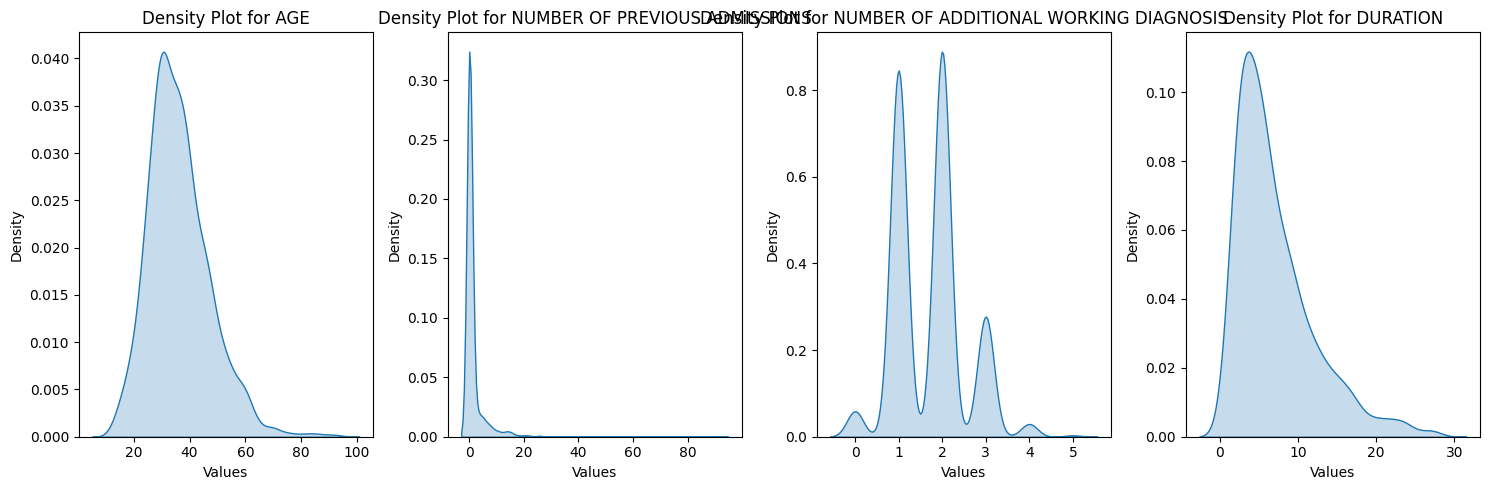

In [79]:
#Plotting Density plot
import seaborn as sns

continuous_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS','DURATION']

fig, axes = plt.subplots(1, len(continuous_features), figsize=(15, 5))

for i, col in enumerate(continuous_features):
  sns.kdeplot(data[col], fill=True,ax=axes[i])
  axes[i].set_title(f'Density Plot for {col}')
  axes[i].set_xlabel('Values')
  axes[i].set_ylabel('Density')
# plt.figure(figsize=(8,9))
# plt.bar(data['AGE'])
plt.tight_layout()
plt.show

In [80]:
data2.head(2)

,AGE,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,NUMBER OF PREVIOUS ADMISSIONS,DURATION,SEX_F,SEX_M,RELIGION_CATHOLIC,RELIGION_COU,RELIGION_ISLAM,RELIGION_OTHERS,...,MONTH OF ADMISSION_December,MONTH OF ADMISSION_February,MONTH OF ADMISSION_January,MONTH OF ADMISSION_July,MONTH OF ADMISSION_June,MONTH OF ADMISSION_March,MONTH OF ADMISSION_May,MONTH OF ADMISSION_November,MONTH OF ADMISSION_October,MONTH OF ADMISSION_September
5,0.1375,0.2,0.021739,3,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0.0625,0.4,0.043478,5,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [81]:
data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'].unique()

array([0.2, 0.4, 0.6, 1. , 0.8, 0. ])

In [82]:
data2.shape

(1289, 41)

In [83]:
#Saving Preprocced data
#data.to_excel('preprocessed1_TB-4a.xlsx', index=False)

In [84]:
#extracting features and targets

X = data2.drop(columns=['DURATION']).values
y = data2['DURATION'].values

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [85]:
print(X)

[[0.1375     0.2        0.02173913 ... 0.         0.         0.        ]
 [0.0625     0.4        0.04347826 ... 0.         0.         0.        ]
 [0.3        0.6        0.05434783 ... 0.         0.         0.        ]
 ...
 [0.2375     0.4        0.         ... 0.         0.         0.        ]
 [0.2125     0.4        0.         ... 0.         0.         0.        ]
 [0.3375     0.4        0.         ... 0.         0.         0.        ]]


In [86]:
print(X.shape)

(1289, 40)


#**Model training**

##Initials

In [146]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
tf.random.set_seed(123)


In [105]:
# Create a custom layer to estimate p and q
class PQEstimationLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PQEstimationLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.p = self.add_weight("p", initializer=tf.keras.initializers.Constant(1.0), trainable=True)
        self.q = self.add_weight("q", initializer=tf.keras.initializers.Constant(1.0), trainable=True)

    def call(self, inputs):
        return self.p, self.q

# Create a function to build your neural network model
def build_model():
    model_input = tf.keras.layers.Input(shape=(40,))
    hidden_layer1 = tf.keras.layers.Dense(units=64, activation='relu')(model_input)
    dropout1 = tf.keras.layers.Dropout(0.2)(hidden_layer1)
    batch_norm1 = tf.keras.layers.BatchNormalization()(dropout1)
    hidden_layer2 = tf.keras.layers.Dense(units=64, activation='relu')(batch_norm1)
    dropout2 = tf.keras.layers.Dropout(0.2)(hidden_layer2)
    batch_norm2 = tf.keras.layers.BatchNormalization()(dropout2)
    output = tf.keras.layers.Dense(units=1)(batch_norm2)

    return tf.keras.Model(inputs=model_input, outputs=output)

In [126]:
# Mean Squared Error (MSE) loss
def custom_mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Weibull loss
def weibull_loss(Y_true, Y_pred, p, q):
    weibull_term = Y_true - (-tf.math.log(q) * (1/p) * tf.exp(Y_pred))
    return tf.reduce_mean(weibull_term)

# Loglogistic loss
def loglogistic_loss(Y_true, Y_pred, p, q):
    log_q = tf.math.log(q)
    loglogistic_term = Y_true - (log_q ** (- 1) - 1) * (1 / p) * tf.exp(Y_pred)
    return tf.reduce_mean(loglogistic_term)


##Loglogistic

Best lambda for fold 1: 0.01
Best combined loss for fold 1: 16.546083450317383
Validation loss for Fold 1: 57.29856872558594
Mean loss for fold 1: 79.52481842041016


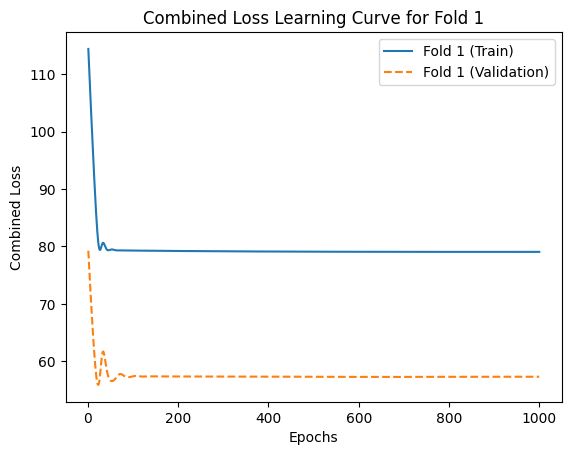

Best lambda for fold 2: 0.01
Best combined loss for fold 2: 15.293617248535156
Validation loss for Fold 2: 72.16912841796875
Mean loss for fold 2: 75.65170288085938


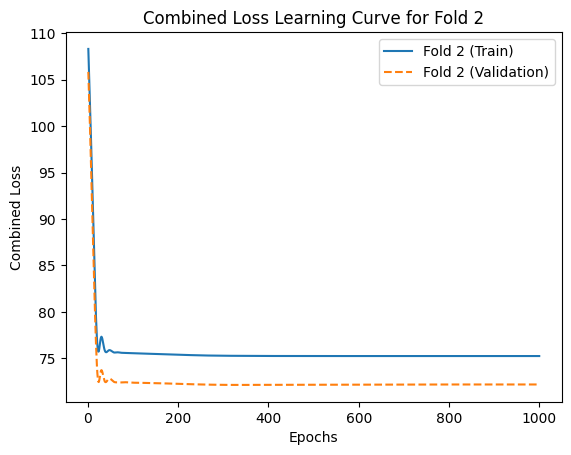

Best lambda for fold 3: 0.001
Best combined loss for fold 3: 14.295927047729492
Validation loss for Fold 3: 88.2795181274414
Mean loss for fold 3: 71.74948120117188


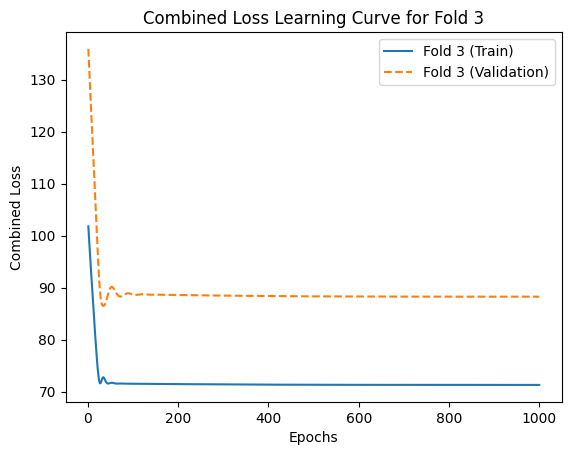

Best lambda for fold 4: 0.001
Best combined loss for fold 4: 9.085444450378418
Validation loss for Fold 4: 101.69741821289062
Mean loss for fold 4: 68.6386947631836


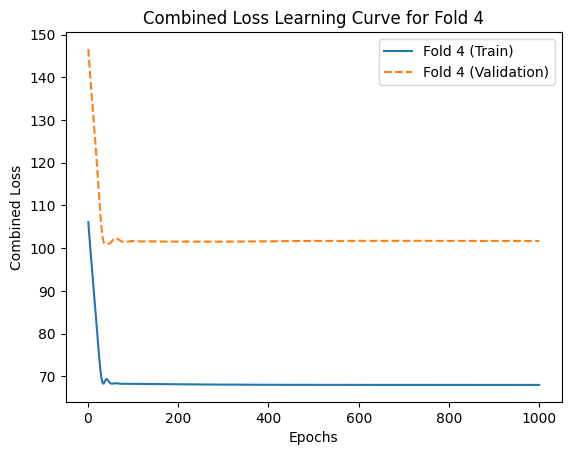

Best lambda for fold 5: 0.001
Best combined loss for fold 5: 16.802133560180664
Validation loss for Fold 5: 56.830806732177734
Mean loss for fold 5: 79.56573486328125


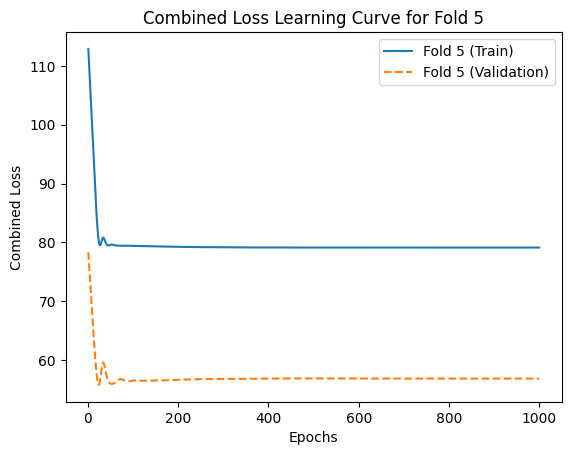

In [147]:

# Define lambda values for hyperparameter tuning
lambda_values = [0.001, 0.01, 0.1, 1, 10]

# Implement 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store loss values for each fold
fold_losses = []
# Store mean loss for each fold
mean_losses = []
# Store validation loss for each fold
val_losses = []
i = 0

for train_index, test_index in kf.split(X_train):
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]

    best_lambda = None
    best_loss = float('inf')
    i = i + 1
    for lambda_value in lambda_values:
        model = build_model()
        pq_layer = PQEstimationLayer()
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

        fold_loss = []  # Store loss values for this fold and lambda value
        fold_val_loss = []  # Store validation loss for this fold

        for epoch in range(1000):
            with tf.GradientTape(persistent=True) as tape:
                model_output = model(X_train1)
                p, q = pq_layer(X_train1)

                mse_loss = tf.reduce_mean(tf.square(Y_train - model_output))
                loglogistic_term = Y_train - ((q **(- 1) - 1) ** (1/p)) * tf.exp(model_output)
                loglogistic_loss = tf.reduce_mean(loglogistic_term)

                combined_loss = mse_loss + lambda_value * loglogistic_loss

                # Calculate validation loss
                val_output = model(X_test1)
                val_mse_loss = tf.reduce_mean(tf.square(Y_test - val_output))
                val_loglogistic_term = Y_test - ((q ** (- 1) - 1) ** (1/p)) * tf.exp(val_output)
                val_loglogistic_loss = tf.reduce_mean(val_loglogistic_term)
                val_combined_loss = val_mse_loss + lambda_value * val_loglogistic_loss


            gradients = tape.gradient(combined_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            fold_loss.append(combined_loss.numpy())
            fold_val_loss.append(val_combined_loss.numpy())


        # Calculate the combined loss after training
        mse_loss_final = tf.reduce_mean(fold_loss)
        combined_loss_final = mse_loss_final  # In this case, we don't need to include lambda

        if combined_loss_final < best_loss:
            best_lambda = lambda_value
            best_loss = combined_loss_final

    print(f"Best lambda for fold {i}: {best_lambda}")
    print(f"Best combined loss for fold {i}: {best_loss}")
    print(f"Validation loss for Fold {i}: {fold_val_loss[-1]}")  # Print the final validation loss


    fold_losses.append(fold_loss)  # Store the loss values for this fold
    val_losses.append(fold_val_loss)  # Store validation loss for this fold


    # Calculate and print the mean loss for this fold
    mean_loss = np.mean(fold_loss)
    mean_losses.append(mean_loss)  # Store the mean loss for this fold
    print(f"Mean loss for fold {i}: {mean_loss}")

    # Plot the learning curve for this fold (training and validation)
    plt.plot(range(1, len(fold_loss) + 1), fold_loss, label=f"Fold {i} (Train)")
    plt.plot(range(1, len(fold_val_loss) + 1), fold_val_loss, linestyle='dashed', label=f"Fold {i} (Validation)")

    plt.xlabel('Epochs')
    plt.ylabel('Combined Loss')
    plt.title(f'Combined Loss Learning Curve for Fold {i}')
    plt.legend()
    plt.show()




In [148]:
# Calculate and print the overall mean of the means of the folds
overall_mean_loss = np.mean(mean_losses)
print(f"Mean of The Losses of Folds: {overall_mean_loss}")

Mean of The Losses of Folds: 75.02608489990234


In [149]:
# Evaluate on the test set after training
test_output = model(X_test)
test_mse_loss = custom_mse_loss(y_test, test_output)

print(f"Test MSE loss: {test_mse_loss}")


Test MSE loss: 28.72173500061035


##Weibull

Best lambda for fold 1: 0.001
Best combined loss for fold 1: 0.08432760089635849
Validation loss for Fold 1: 51.33436584472656
Mean loss for fold 1: 63.04838180541992


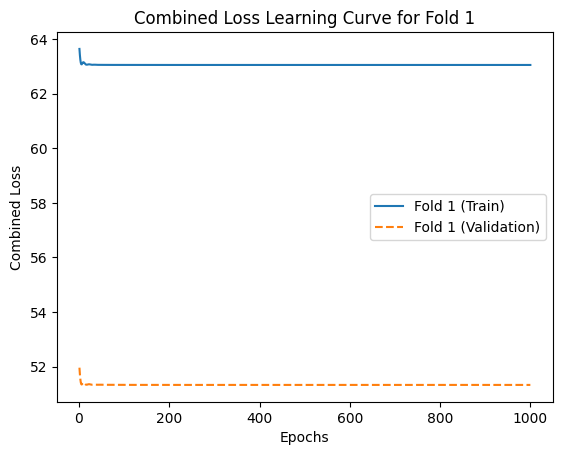

Best lambda for fold 2: 0.001
Best combined loss for fold 2: 0.09070660173892975
Validation loss for Fold 2: 61.328006744384766
Mean loss for fold 2: 60.54935836791992


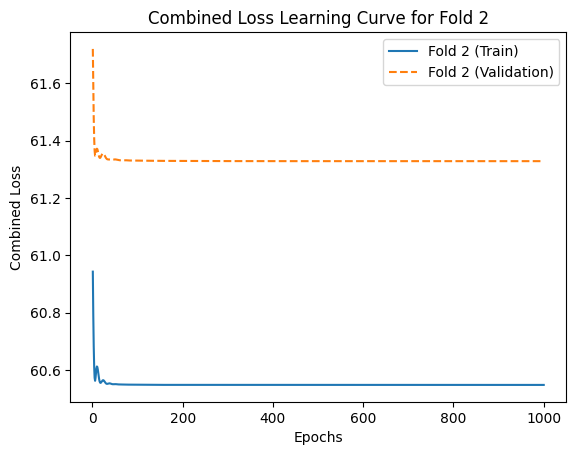

Best lambda for fold 3: 0.001
Best combined loss for fold 3: 0.08508503437042236
Validation loss for Fold 3: 73.21334075927734
Mean loss for fold 3: 57.57822799682617


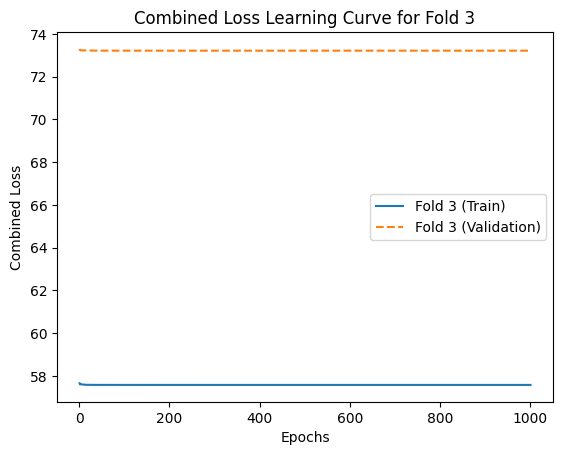

Best lambda for fold 4: 0.001
Best combined loss for fold 4: 0.08548548817634583
Validation loss for Fold 4: 65.70655822753906
Mean loss for fold 4: 59.458438873291016


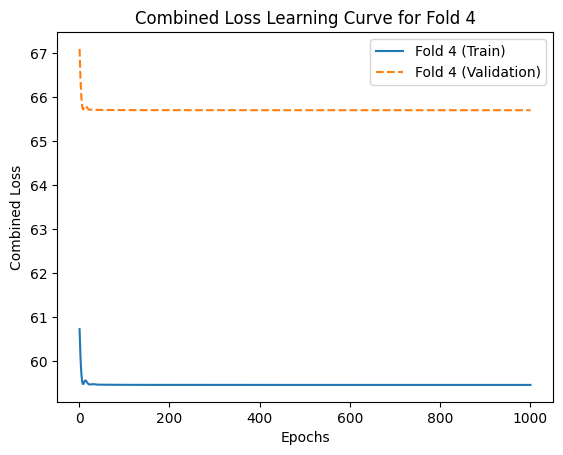

Best lambda for fold 5: 0.001
Best combined loss for fold 5: 0.08674994856119156
Validation loss for Fold 5: 51.96039962768555
Mean loss for fold 5: 62.89360427856445


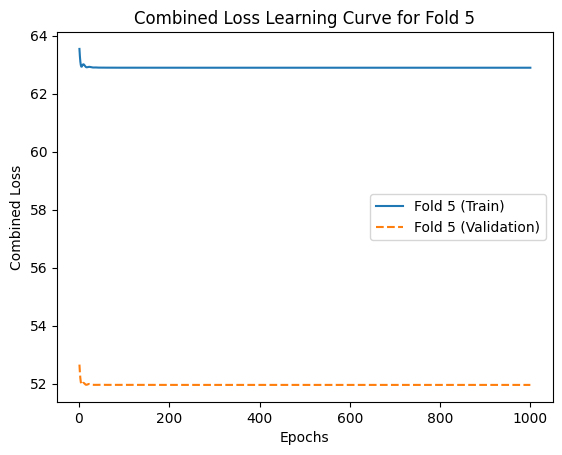

In [153]:

# Define lambda values for hyperparameter tuning
lambda_values = [0.001, 0.01, 0.1, 1, 10]

# Implement 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store loss values for each fold
fold_losses = []
val_losses = []  # Store validation loss for each fold
mean_losses = []  # Store mean loss for each fold
test_losses = []  # Store test loss for each fold

i = 0

for train_index, test_index in kf.split(X_train):
    X_train2, X_test2 = X_train[train_index], X_train[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]

    best_lambda = None
    best_loss = float('inf')
    i = i + 1
    for lambda_value in lambda_values:
        model = build_model()
        pq_layer = PQEstimationLayer()
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

        fold_loss = []  # Store loss values for this fold and lambda value
        fold_val_loss = []  # Store validation loss for this fold

        for epoch in range(1000):
            with tf.GradientTape(persistent=True) as tape:
                model_output2 = model(X_train2)
                p, q = pq_layer(X_train1)

                mse_loss = custom_mse_loss(X_train2, model_output2)
                weibull_loss_train = weibull_loss(Y_train, model_output,p,q)
                combined_loss = mse_loss + lambda_value * weibull_loss_train

                # Calculate validation loss
                val_output = model(X_test2)
                val_mse_loss = custom_mse_loss(X_test2, val_output)
                val_weibull_loss = weibull_loss(Y_test, val_output, p, q)
                val_combined_loss = val_mse_loss + lambda_value * val_weibull_loss




            gradients = tape.gradient(combined_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            fold_loss.append(combined_loss.numpy())
            fold_val_loss.append(val_combined_loss.numpy())


        # Calculate the combined loss after training
        mse_loss_final = tf.reduce_mean(fold_loss)
        combined_loss_final = mse_loss_final  # In this case, we don't need to include lambda

        if combined_loss_final < best_loss:
            best_lambda = lambda_value
            best_loss = combined_loss_final

    print(f"Best lambda for fold {i}: {best_lambda}")
    print(f"Best combined loss for fold {i}: {best_loss}")
    print(f"Validation loss for Fold {i}: {fold_val_loss[-1]}")  # Print the final validation loss


    fold_losses.append(fold_loss)  # Store the loss values for this fold
    val_losses.append(fold_val_loss)  # Store validation loss for this fold


    # Calculate and print the mean loss for this fold
    mean_loss = np.mean(fold_loss)
    mean_losses.append(mean_loss)  # Store the mean loss for this fold
    print(f"Mean loss for fold {i}: {mean_loss}")

    # Plot the learning curve for this fold (training and validation)
    plt.plot(range(1, len(fold_loss) + 1), fold_loss, label=f"Fold {i} (Train)")
    plt.plot(range(1, len(fold_val_loss) + 1), fold_val_loss, linestyle='dashed', label=f"Fold {i} (Validation)")

    plt.xlabel('Epochs')
    plt.ylabel('Combined Loss')
    plt.title(f'Combined Loss Learning Curve for Fold {i}')
    plt.legend()
    plt.show()





In [154]:
# Calculate and print the overall mean of the means of the folds
overall_mean_loss = np.mean(mean_losses)
print(f"Overall Mean of Means of Folds: {overall_mean_loss}")


Overall Mean of Means of Folds: 60.705604553222656


In [155]:
# Evaluate on the test set after training
test_output = model(X_test)
test_mse_loss = custom_mse_loss(y_test, test_output)

print(f"Test MSE loss: {test_mse_loss}")

Test MSE loss: 72.92198944091797
